## Generate ground truth for Q&A pairs

In [3]:
import basico
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from basico import biomodels

### ODE models

##### Precision Medicine Model

In [2]:
# generate expected answers for the basic prompts
# precision medicine model
#mod_precision = basico.load_biomodel('BIOMD0000000537')
mod_precision = basico.load_model(r'./models/BIOMD0000000537_url.xml')
print(basico.get_model_name())
# run simulation for set 1 and get the ground truth answer
tc = basico.run_time_course(2016, 2016)
tc.iloc[-1]["CRP{serum}"]

Dwivedi2014 - Crohns IL6 Disease model - Anti-IL6R Antibody


2.269133521981739

##### Epidemiology Model

In [3]:
# epidemiology mode
#mod_epidemiology = basico.load_biomodel('BIOMD0000000971')
mod_epidemiology = basico.load_model(r'./models/Tang2020.xml')
print(basico.get_model_name())

Tang2020 - Estimation of transmission risk of COVID-19 and impact of public health interventions


##### Theoretical Model

In [4]:
# epidemiology mode
#mod_theory = basico.load_biomodel('BIOMD0000000027')
mod_theory = basico.load_model(r'./models/BIOMD0000000027_url.xml')
print(basico.get_model_name())

Markevich2004 - MAPK double phosphorylation,  ordered Michaelis-Menton


## Simulate model tool

In [ ]:
def run_precision_model(interval, time, species, concentration):
    basico.set_species(name = species, model = mod_precision, initial_concentration = concentration)
    # check if the species was set correctly
    #print(basico.get_species(name = species, model = mod_precision)['initial_concentration'])
    # run simulations
    tc = basico.run_time_course(duration = time, intervals = interval, model = mod_precision, update_model = False)
    return tc.iloc[-1][["CRP{serum}",  "CRP{liver}", "IL6{serum}", "STAT3{gut}"]]

In [ ]:
def run_epidemiology_model(interval, time):
    tc = basico.run_time_course(duration = time, intervals = interval, model = mod_epidemiology, update_model = False)
    return tc.iloc[-1][["Infected", "Susceptible", "Recovered", "Hospitalised"]]

In [ ]:
def run_theory_model(interval, time):
    tc = basico.run_time_course(duration = time, intervals = interval, model = mod_theory, update_model = False)
    return tc.iloc[-1][["Mpp", "M", "Mp"]]

In [ ]:
def run_theory_model_set_parameters(interval, time, parameter, value):
    basico.set_parameters(name = parameter, initial_value = value, model = mod_theory)
    tc = basico.run_time_course(duration = time, intervals = interval, model = mod_theory, update_model = False)
    return tc.iloc[-1][["Mpp", "M", "Mp"]]

In [ ]:
# Run with different random conditions and store in dictionary
results = {}
# time 
conditions = [
    (50, 100),
    (100, 200),
    (180, 400),
    (500, 1000), 
    (20, 400),
    (10, 10)
]

for time, interval in conditions:
    key = f"interval_{interval}_time_{time}"
    results[key] = run_epidemiology_model(interval, time)

results

{'interval_100_time_50': Infected        1.043385e+05
 Susceptible     1.017891e+06
 Recovered       2.231583e+06
 Hospitalised    1.325140e+05
 Name: 50.0, dtype: float64,
 'interval_200_time_100': Infected        7.143353e+04
 Susceptible     1.055609e+06
 Recovered       4.586298e+06
 Hospitalised    8.688262e+04
 Name: 100.0, dtype: float64,
 'interval_400_time_180': Infected        4.031662e+04
 Susceptible     1.055585e+06
 Recovered       6.955857e+06
 Hospitalised    4.901975e+04
 Name: 180.0, dtype: float64,
 'interval_1000_time_500': Infected        4.090069e+03
 Susceptible     1.055585e+06
 Recovered       9.714202e+06
 Hospitalised    4.972991e+03
 Name: 500.0, dtype: float64,
 'interval_400_time_20': Infected        1.206681e+05
 Susceptible     3.167693e+06
 Recovered       1.634611e+05
 Hospitalised    4.076004e+04
 Name: 20.0, dtype: float64,
 'interval_10_time_10': Infected        3.413654e+03
 Susceptible     1.079620e+07
 Recovered       2.980390e+03
 Hospitalised  

In [ ]:
# Run with different random conditions and store in dictionary
results = {}
# time 
conditions = [
    (1000, 100),
    (1000, 1000),
    (180, 400),
    (500, 1000), 
    (20, 400),
    (10, 10)
]

for time, interval in conditions:
    key = f"interval_{interval}_time_{time}"
    results[key] = run_theory_model(interval, time)

results

{'interval_100_time_1000': Mpp    493.786732
 M        0.782237
 Mp       5.431030
 Name: 1000.0, dtype: float64,
 'interval_1000_time_1000': Mpp    493.786732
 M        0.782237
 Mp       5.431030
 Name: 1000.0, dtype: float64,
 'interval_400_time_180': Mpp    491.137882
 M        3.033640
 Mp       5.828478
 Name: 180.0, dtype: float64,
 'interval_1000_time_500': Mpp    493.786732
 M        0.782237
 Mp       5.431030
 Name: 500.0, dtype: float64,
 'interval_400_time_20': Mpp     45.234214
 M      424.991709
 Mp      29.774077
 Name: 20.0, dtype: float64,
 'interval_10_time_10': Mpp     17.029310
 M      460.393300
 Mp      22.577389
 Name: 10.0, dtype: float64}

In [ ]:
# run theory model with different parameters
results = {}
# time 
interval = 1000
conditions = [
    (100, 'k1cat', 0.1),
    (1000, 'k1cat', 1),
    (180, 'k1cat', 100),
    (500, 'k2cat', 10), 
    (20, 'k2cat', 0.1),
    (10, 'k2cat', 100)
]

for time, parameter, value in conditions:
    key = f"time_{time}_parameter_{parameter}_value_{value}"
    results[key] = run_theory_model_set_parameters(interval, time, parameter, value)

results

{'time_100_parameter_k1cat_value_0.1': Mpp    317.356267
 M      154.982325
 Mp      27.661408
 Name: 100.0, dtype: float64,
 'time_1000_parameter_k1cat_value_1': Mpp    494.565011
 M        0.076041
 Mp       5.358948
 Name: 1000.0, dtype: float64,
 'time_180_parameter_k1cat_value_100': Mpp    494.647985
 M        0.000758
 Mp       5.351257
 Name: 180.0, dtype: float64,
 'time_500_parameter_k2cat_value_10': Mpp    491.982136
 M        0.001140
 Mp       8.016723
 Name: 500.0, dtype: float64,
 'time_20_parameter_k2cat_value_0.1': Mpp     42.542954
 M        0.103107
 Mp     457.353939
 Name: 20.0, dtype: float64,
 'time_10_parameter_k2cat_value_100': Mpp    499.195565
 M        0.000113
 Mp       0.804322
 Name: 10.0, dtype: float64}

## Steady state

In [9]:
mod_precision = basico.load_model(r'./models/BIOMD0000000537_url.xml')
basico.task_steadystate.run_steadystate()
basico.get_species().head()

Error while running the simulation: >WARNING 2025-09-19T17:39:31<
  CSteadyState (2): No steady state was found.


,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
IL6,serum,reactions,nmol/l,0.000436,2.623419e+11,,,0.000436,2.623419e+11,-1.621620e-17,-0.009766,Metabolite_114,mwf626e95e_543f_41e4_aad4_c6bf60ab345b,0.028719,IL6{serum}
sgp130,serum,reactions,nmol/l,3.900000,2.348635e+15,,,3.900000,2.348635e+15,4.167564e-16,0.250977,Metabolite_115,mwbbbce920_e8dd_4320_9386_fc94bfb2fc99,0.997567,sgp130{serum}
sR_IL6_sgp130,serum,reactions,nmol/l,0.087406,5.263716e+13,,,0.087406,5.263716e+13,-2.367565e-16,-0.142578,Metabolite_116,mw810ff751_fa4e_4143_bd50_169b3e325e1e,9.190533,sR_IL6_sgp130{serum}
CRP,serum,reactions,nmol/l,221.063676,1.331277e+17,,,221.063676,1.331277e+17,6.243627e-13,376.000000,Metabolite_117,mw114aa90f_5f5b_4fe8_9406_361c8489b6a1,2.777778,CRP{serum}
sR,serum,reactions,nmol/l,4.253507,2.561522e+15,,,4.253507,2.561522e+15,1.328431e-14,8.000000,Metabolite_118,mw30ae63db_6cd3_4b6f_93ad_3350cd360bcc,3.283772,sR{serum}


In [10]:
mod_theory = basico.load_model(r'./models/BIOMD0000000027_url.xml')
basico.task_steadystate.run_steadystate()
basico.get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
M,uVol,reactions,nmol/l,500.0,3.011070e+17,,,437.729984,2.636072e+17,1.037837e-16,0.0625,Metabolite_158,M,978.030464,M
Mp,uVol,reactions,nmol/l,0.0,0.000000e+00,,,12.852481,7.739945e+15,-4.151348e-16,-0.2500,Metabolite_159,Mp,5.313708,Mp
Mpp,uVol,reactions,nmol/l,0.0,0.000000e+00,,,49.417535,2.975994e+16,4.151348e-16,0.2500,Metabolite_160,Mpp,25.070051,Mpp
MAPKK,uVol,fixed,nmol/l,50.0,3.011070e+16,,,50.000000,3.011070e+16,0.000000e+00,0.0000,Metabolite_161,MAPKK,NaN,MAPKK
MKP3,uVol,fixed,nmol/l,100.0,6.022141e+16,,,100.000000,6.022141e+16,0.000000e+00,0.0000,Metabolite_162,MKP3,NaN,MKP3


In [11]:
mod_epidemiology = basico.load_model(r'./models/Tang2020.xml')
basico.task_steadystate.run_steadystate()
basico.get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
Susceptible,Wuhan,reactions,#/ml,1.108100e+07,1.108100e+07,,,1.107825e+07,1.107825e+07,4.237148e-24,4.237148e-24,Metabolite_163,Susceptible,9.765576e+29,Susceptible
Exposed,Wuhan,reactions,#/ml,1.051000e+02,1.051000e+02,,,5.997059e-24,5.997059e-24,-1.452434e-25,-1.452434e-25,Metabolite_164,Exposed,7.000007e+00,Exposed
Infected,Wuhan,reactions,#/ml,2.767900e+01,2.767900e+01,,,1.137373e-24,1.137373e-24,2.173586e-25,2.173586e-25,Metabolite_165,Infected,1.528880e+00,Infected
Asymptomatic,Wuhan,reactions,#/ml,5.353900e+01,5.353900e+01,,,-9.305782e-25,-9.305782e-25,2.428722e-25,2.428722e-25,Metabolite_166,Asymptomatic,3.831555e+00,Asymptomatic
Susceptible_quarantined,Wuhan,reactions,#/ml,7.390000e+02,7.390000e+02,,,1.588187e-22,1.588187e-22,-4.948627e-24,-4.948627e-24,Metabolite_167,Susceptible_quarantined,1.400001e+01,Susceptible_quarantined
Exposed_quarantined,Wuhan,reactions,#/ml,1.164200e+00,1.164200e+00,,,-1.085675e-24,-1.085675e-24,1.366866e-25,1.366866e-25,Metabolite_168,Exposed_quarantined,7.942804e+00,Exposed_quarantined
Hospitalised,Wuhan,reactions,#/ml,1.000000e+00,1.000000e+00,,,-1.240771e-24,-1.240771e-24,1.584469e-25,1.584469e-25,Metabolite_169,Hospitalised,4.204104e+00,Hospitalised
Recovered,Wuhan,reactions,#/ml,2.000000e+00,2.000000e+00,,,2.030779e+01,2.030779e+01,1.013596e-25,1.013596e-25,Metabolite_170,Recovered,5.405853e+25,Recovered


## Search models


In [15]:
# Search model ussing basico
results = biomodels.search_for_model(query = "precision medicine",
                                      num_results = 100)
print(len(results))

results

7


[{'format': 'SBML',
  'id': 'BIOMD0000000583',
  'lastModified': None,
  'name': 'Leber2015 - Mucosal immunity and gut microbiome interaction during C. difficile infection',
  'submissionDate': '2015-07-19T23:00:00Z',
  'submitter': 'Andrew Leber',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000583'},
 {'format': 'SBML',
  'id': 'BIOMD0000000962',
  'lastModified': None,
  'name': 'Zhao2020 - SUQC model of COVID-19 transmission dynamics in Wuhan, Hubei, and China',
  'submissionDate': '2020-08-25T23:00:00Z',
  'submitter': 'Kausthubh Ramachandran',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000962'},
 {'format': 'SBML',
  'id': 'MODEL2106070001',
  'lastModified': None,
  'name': 'Montagud2022 - Prostate cancer Boolean model',
  'submissionDate': '2021-06-06T23:00:00Z',
  'submitter': 'Arnau Montagud',
  'url': 'https://www.ebi.ac.uk/biomodels/MODEL2106070001'},
 {'format': 'SBML',
  'id': 'MODEL2203300001',
  'lastModified': None,
  'name': 'Bannerman2022 Whole Genome M

In [16]:
results = biomodels.search_for_model(query = "crohn's disease",
                                      num_results = 100)
print(len(results))
results

5


[{'format': 'SBML',
  'id': 'BIOMD0000000534',
  'lastModified': None,
  'name': 'Dwivedi2014 - Healthy Volunteer IL6 Model',
  'submissionDate': '2014-08-04T23:00:00Z',
  'submitter': 'Vincent Knight-Schrijver',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000534'},
 {'format': 'SBML',
  'id': 'BIOMD0000000535',
  'lastModified': None,
  'name': 'Dwivedi2014 - Crohns IL6 Disease model - Anti-IL6 Antibody',
  'submissionDate': '2014-08-04T23:00:00Z',
  'submitter': 'Vincent Knight-Schrijver',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000535'},
 {'format': 'SBML',
  'id': 'BIOMD0000000536',
  'lastModified': None,
  'name': 'Dwivedi2014 - Crohns IL6 Disease model - sgp130 activity',
  'submissionDate': '2014-08-04T23:00:00Z',
  'submitter': 'Vincent Knight-Schrijver',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000536'},
 {'format': 'SBML',
  'id': 'BIOMD0000000537',
  'lastModified': None,
  'name': 'Dwivedi2014 - Crohns IL6 Disease model - Anti-IL6R Antibody',
  

In [17]:
results = biomodels.search_for_model(query = "covid-19",
                                      num_results = 100)
print(len(results))
results

43


[{'format': 'SBML',
  'id': 'BIOMD0000000955',
  'lastModified': None,
  'name': 'Giordano2020 - SIDARTHE model of COVID-19 spread in Italy',
  'submissionDate': '2020-07-27T23:00:00Z',
  'submitter': 'Kausthubh Ramachandran',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000955'},
 {'format': 'SBML',
  'id': 'BIOMD0000000956',
  'lastModified': None,
  'name': 'Bertozzi2020 - SIR model of scenarios of COVID-19 spread in CA and NY',
  'submissionDate': '2020-08-06T23:00:00Z',
  'submitter': 'Kausthubh Ramachandran',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000956'},
 {'format': 'SBML',
  'id': 'BIOMD0000000957',
  'lastModified': None,
  'name': 'Roda2020 - SIR model of COVID-19 spread in Wuhan',
  'submissionDate': '2020-08-10T23:00:00Z',
  'submitter': 'Kausthubh Ramachandran',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000957'},
 {'format': 'SBML',
  'id': 'BIOMD0000000958',
  'lastModified': None,
  'name': 'Ndairou2020 - early-stage transmission dynamics of 

In [18]:
results = biomodels.search_for_model(query = "gut",
                                      num_results = 100)
print(len(results))
results

58


[{'format': 'SBML',
  'id': 'BIOMD0000000451',
  'lastModified': None,
  'name': 'Carbo2013 - Cytokine driven CD4+ T Cell differentiation and phenotype plasticity',
  'submissionDate': '2013-04-22T23:00:00Z',
  'submitter': 'Adria Carbo',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000451'},
 {'format': 'SBML',
  'id': 'BIOMD0000000527',
  'lastModified': None,
  'name': 'Kaiser2014 - Salmonella persistence after ciprofloxacin treatment',
  'submissionDate': '2013-12-17T00:00:00Z',
  'submitter': 'Roland Regoes',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000527'},
 {'format': 'SBML',
  'id': 'BIOMD0000000583',
  'lastModified': None,
  'name': 'Leber2015 - Mucosal immunity and gut microbiome interaction during C. difficile infection',
  'submissionDate': '2015-07-19T23:00:00Z',
  'submitter': 'Andrew Leber',
  'url': 'https://www.ebi.ac.uk/biomodels/BIOMD0000000583'},
 {'format': 'SBML',
  'id': 'BIOMD0000000619',
  'lastModified': None,
  'name': 'Sluka2016  - Acetamin

## Get modelinfo tool

### Units

In [21]:
units = basico.model_info.get_model_units(model=mod_precision)
#save the dictionary as csv
with open(r'./tables/units_537.pkl', 'wb') as f:
    pickle.dump(units, f)

In [22]:
units = basico.model_info.get_model_units(model=mod_epidemiology)
with open(r'./tables/units_971.pkl', 'wb') as f:
    pickle.dump(units, f)

In [23]:
basico.model_info.get_model_units(model=mod_theory)
with open(r'./tables/units_27.pkl', 'wb') as f:
    pickle.dump(units, f)

### Compartments

In [26]:
df = basico.model_info.get_compartments(model=mod_precision)
df.to_csv(r'./tables/compartments_537.csv', index=False)

In [50]:
df = basico.model_info.get_compartments(model=mod_epidemiology)
df.to_csv(r'./tables/compartments_971.csv', index=False)

df = basico.model_info.get_compartments(model=mod_theory)
df.to_csv(r'./tables/compartments_27.csv', index=False)

In [52]:
df

,type,unit,initial_size,initial_expression,dimensionality,expression,size,rate,key,sbml_id,display_name
name,,,,,,,,,,,
uVol,fixed,l,1.0,,3,,1.0,0.0,Compartment_5,uVol,Compartments[uVol]


### Species

In [48]:
df = basico.model_info.get_species(model=mod_precision)
df.reset_index(inplace=True)
df[["name" ,"compartment",
    "type",
    "unit",
    "initial_concentration",
    "display_name",
                ]].to_csv(r'./tables/species_537.csv', index=False)

df = basico.model_info.get_species(model=mod_epidemiology)
df.reset_index(inplace=True)
df[["name" ,"compartment",
    "type",
    "unit",
    "initial_concentration",
    "display_name",
                ]].to_csv(r'./tables/species_971.csv', index=False)

df = basico.model_info.get_species(model=mod_theory)
df.reset_index(inplace=True)
df[["name" ,"compartment",
    "type",
    "unit",
    "initial_concentration",
    "display_name",
                ]].to_csv(r'./tables/species_27.csv', index=False)


### Parameters

In [46]:
df = basico.model_info.get_parameters(model=mod_precision)
df.reset_index(inplace=True)
df[["name", "type", "unit", "initial_value", "display_name"]].to_csv(r'./tables/parameters_537.csv', index=False)

df = basico.model_info.get_parameters(model=mod_epidemiology)
df.reset_index(inplace=True)
df[["name", "type", "unit", "initial_value", "display_name"]].to_csv(r'./tables/parameters_971.csv', index=False)

df = basico.model_info.get_parameters(model=mod_theory)
df.reset_index(inplace=True)
df[["name", "type", "unit", "initial_value", "display_name"]].to_csv(r'./tables/parameters_27.csv', index=False)

In [47]:
df

,name,type,unit,initial_value,initial_expression,expression,value,rate,key,sbml_id,display_name
0,k1cat,fixed,,0.010,,,0.010,0.0,ModelValue_69,k1cat,Values[k1cat]
1,Km1,fixed,,50.000,,,50.000,0.0,ModelValue_70,Km1,Values[Km1]
2,k2cat,fixed,,15.000,,,15.000,0.0,ModelValue_71,k2cat,Values[k2cat]
3,Km2,fixed,,500.000,,,500.000,0.0,ModelValue_72,Km2,Values[Km2]
4,k3cat,fixed,,0.084,,,0.084,0.0,ModelValue_73,k3cat,Values[k3cat]
5,Km3,fixed,,22.000,,,22.000,0.0,ModelValue_74,Km3,Values[Km3]
6,k4cat,fixed,,0.060,,,0.060,0.0,ModelValue_75,k4cat,Values[k4cat]
7,Km4,fixed,,18.000,,,18.000,0.0,ModelValue_76,Km4,Values[Km4]
8,Km5,fixed,,78.000,,,78.000,0.0,ModelValue_77,Km5,Values[Km5]


## Steady state (tabular)

In [ ]:
stst = basico.run_steadystate(model=mod_epidemiology)
df = basico.get_species(model=mod_epidemiology)
df.reset_index(inplace=True)
df_short = df[["display_name", "compartment", "unit", "initial_concentration", 'concentration', "rate", "transition_time"]]
#rename the columns concentration to steady_state_concentration and transition time to steady_state_transition_time
df_short = df_short.rename(columns={"concentration": "steady_state_concentration", "transition_time": "steady_state_transition_time"})
df_short.to_csv(r'./tables/stst_971.csv', index=False)

In [70]:
# custom plotter
stst = basico.run_steadystate(model=mod_theory)
df = basico.get_species(model=mod_theory)
df.reset_index(inplace=True)
df_short = df[["display_name", "compartment", "unit", "initial_concentration", 'concentration', "rate", "transition_time"]]
#rename the columns concentration to steady_state_concentration and transition time to steady_state_transition_time
df_short = df_short.rename(columns={"concentration": "steady_state_concentration", "transition_time": "steady_state_transition_time"})
df_short.to_csv(r'./tables/stst_27.csv', index=False)

## Custom plotter


In [74]:
tc = basico.run_time_course(2016, 2016, model = mod_precision)
tc.reset_index(inplace=True)
tc.to_csv(r'./tables/tc_537.csv', index=False)

In [77]:
tc = basico.run_time_course(50, 50, model = mod_epidemiology)
tc.reset_index(inplace=True)
tc.to_csv(r'./tables/tc_971.csv', index=False)

In [78]:
tc = basico.run_time_course(100, 100, model = mod_theory)
tc.reset_index(inplace=True)
tc.to_csv(r'./tables/tc_27.csv', index=False)

In [ ]:
tc = basico.run_time_course(2016, 2016, model = mod_precision)
tc.reset_index(inplace=True)
tc.to_csv(r'./tables/tc_537.csv', index=False)

,Time,sR{serum},sgp130{serum},R_IL6_gp130{liver},IL6{serum},Ab{serum},R,sR_IL6{gut},sR_IL6{liver},R_IL6_gp130{gut},...,sgp130{liver},sR_IL6_sgp130{gut},Ab{peripheral},sR_IL6_sgp130{liver},pSTAT3{gut},STAT3{liver},CRP Suppression (%),CRP (% of baseline),CRP{liver},geneProduct
0,0.0,4.253507,3.900000,6.599359e-05,0.000436,2.381820e-29,0.438236,1.306824e-03,9.761649e-04,8.448905e-05,...,5.589699,0.136304,1.679209e-29,0.116344,9.389364,0.777537,-0.000000,100.000000,158.325847,159.803597
1,1.0,0.000031,3.901765,6.420660e-05,0.000638,6.753452e+02,0.000178,1.055422e-03,9.505457e-04,7.238601e-05,...,5.591034,0.127067,2.144021e-01,0.114914,9.389266,0.777559,0.000001,99.999999,158.325653,159.802738
2,2.0,0.000037,3.905215,6.248857e-05,0.000739,6.522828e+02,0.000070,9.592235e-04,9.156890e-04,6.787804e-05,...,5.594230,0.115733,4.442855e-01,0.110774,9.388692,0.777686,0.000029,99.999971,158.324515,159.797695
3,3.0,0.000043,3.907882,6.013415e-05,0.000756,6.303828e+02,0.000049,8.868956e-04,8.679425e-04,6.452335e-05,...,5.597806,0.107157,6.659729e-01,0.105075,9.387640,0.777986,0.000156,99.999844,158.321844,159.788467
4,4.0,0.000049,3.909825,5.762284e-05,0.000755,6.095828e+02,0.000039,8.257835e-04,8.168815e-04,6.168842e-05,...,5.600867,0.099879,8.798707e-01,0.098958,9.386196,0.778528,0.000495,99.999505,158.317000,159.775787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012.0,0.002114,3.900000,4.346951e-08,0.000643,5.579947e+01,0.001612,7.713982e-07,5.512026e-07,5.653722e-08,...,5.580968,0.000080,2.143331e+01,0.000066,0.031734,9.975746,98.976568,1.023432,0.798438,1.043898
2013,2013.0,0.002119,3.900000,4.355425e-08,0.000643,5.563380e+01,0.001617,7.729185e-07,5.522847e-07,5.664315e-08,...,5.580968,0.000080,2.141546e+01,0.000066,0.031781,9.975708,98.975817,1.024183,0.799683,1.045452
2014,2014.0,0.002123,3.900000,4.363933e-08,0.000643,5.546843e+01,0.001622,7.744447e-07,5.533709e-07,5.674950e-08,...,5.580968,0.000080,2.139759e+01,0.000067,0.031829,9.975670,98.975062,1.024938,0.800934,1.047014
2015,2015.0,0.002128,3.900000,4.372474e-08,0.000643,5.530337e+01,0.001627,7.759767e-07,5.544612e-07,5.685628e-08,...,5.580968,0.000080,2.137969e+01,0.000067,0.031877,9.975632,98.974302,1.025698,0.802191,1.048584


## Get annotations

In [7]:
basico.get_miriam_annotation(name = "M", model=mod_theory)

{'descriptions': [{'id': 'P26696',
   'qualifier': 'is version of',
   'uri': 'http://identifiers.org/uniprot/P26696',
   'resource': 'UniProt Knowledgebase'}]}

In [12]:
for species in basico.get_species(model=mod_theory).index:
    print(species)
    print(basico.get_miriam_annotation(name = species, model=mod_theory))

M
{'descriptions': [{'id': 'P26696', 'qualifier': 'is version of', 'uri': 'http://identifiers.org/uniprot/P26696', 'resource': 'UniProt Knowledgebase'}]}
Mp
{'descriptions': [{'id': 'P26696', 'qualifier': 'is version of', 'uri': 'http://identifiers.org/uniprot/P26696', 'resource': 'UniProt Knowledgebase'}]}
Mpp
{'descriptions': [{'id': 'P26696', 'qualifier': 'is version of', 'uri': 'http://identifiers.org/uniprot/P26696', 'resource': 'UniProt Knowledgebase'}]}
MAPKK
{'descriptions': [{'id': 'Q05116', 'qualifier': 'is', 'uri': 'http://identifiers.org/uniprot/Q05116', 'resource': 'UniProt Knowledgebase'}]}
MKP3
{'descriptions': [{'id': 'Q90W58', 'qualifier': 'is', 'uri': 'http://identifiers.org/uniprot/Q90W58', 'resource': 'UniProt Knowledgebase'}]}


In [24]:
mod = mod_precision
for species in basico.get_species(model =mod)["display_name"]:
    print(species)
    print(basico.get_miriam_annotation(name = species, model=mod))

IL6{serum}
{'descriptions': [{'id': 'P05231', 'qualifier': 'is version of', 'uri': 'http://identifiers.org/uniprot/P05231', 'resource': 'UniProt Knowledgebase'}]}
sgp130{serum}
{'descriptions': [{'id': 'PR:000001868', 'qualifier': 'is version of', 'uri': 'http://identifiers.org/PR:000001868', 'resource': 'Protein Ontology'}, {'id': 'PATO:0001537', 'qualifier': 'has property', 'uri': 'http://identifiers.org/PATO:0001537', 'resource': 'PATO'}]}
sR_IL6_sgp130{serum}
{'descriptions': [{'id': 'PR:000001868', 'qualifier': 'has part', 'uri': 'http://identifiers.org/PR:000001868', 'resource': 'Protein Ontology'}, {'id': 'P05231', 'qualifier': 'has part', 'uri': 'http://identifiers.org/uniprot/P05231', 'resource': 'UniProt Knowledgebase'}, {'id': 'P08887', 'qualifier': 'has part', 'uri': 'http://identifiers.org/uniprot/P08887', 'resource': 'UniProt Knowledgebase'}, {'id': 'PATO:0001537', 'qualifier': 'has property', 'uri': 'http://identifiers.org/PATO:0001537', 'resource': 'PATO'}]}
CRP{serum}


In [14]:
mod = mod_epidemiology
for species in basico.get_species(model =mod).index:
    print(species)
    print(basico.get_miriam_annotation(name = species, model=mod))

Susceptible
{'descriptions': [{'id': '0000514', 'qualifier': 'is', 'uri': 'http://identifiers.org/ido/0000514', 'resource': 'Infectious Disease Ontology'}, {'id': 'C171133', 'qualifier': 'is version of', 'uri': 'http://identifiers.org/ncit/C171133', 'resource': 'NCIt'}]}
Exposed
{'descriptions': [{'id': '0000514', 'qualifier': 'is', 'uri': 'http://identifiers.org/ido/0000514', 'resource': 'Infectious Disease Ontology'}, {'id': 'C171133', 'qualifier': 'is version of', 'uri': 'http://identifiers.org/ncit/C171133', 'resource': 'NCIt'}, {'id': '0000597', 'qualifier': 'has property', 'uri': 'http://identifiers.org/ido/0000597', 'resource': 'Infectious Disease Ontology'}]}
Infected
{'created': datetime.datetime(2020, 10, 30, 3, 56, 34, tzinfo=tzutc())}
Asymptomatic
{'descriptions': [{'id': '0000569', 'qualifier': 'is', 'uri': 'http://identifiers.org/ido/0000569', 'resource': 'Infectious Disease Ontology'}, {'id': '0000511', 'qualifier': 'is', 'uri': 'http://identifiers.org/ido/0000511', 'res

In [20]:
basico.get_species(model = mod_epidemiology)

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
Susceptible,Wuhan,reactions,#/ml,1.108100e+07,1.108100e+07,,,1.108100e+07,1.108100e+07,-2739.167828,-2739.167828,Metabolite_57,Susceptible,3968.905658,Susceptible
Exposed,Wuhan,reactions,#/ml,1.051000e+02,1.051000e+02,,,1.051000e+02,1.051000e+02,264.485659,264.485659,Metabolite_58,Exposed,0.376029,Exposed
Infected,Wuhan,reactions,#/ml,2.767900e+01,2.767900e+01,,,2.767900e+01,2.767900e+01,0.223005,0.223005,Metabolite_59,Infected,2.123031,Infected
Asymptomatic,Wuhan,reactions,#/ml,5.353900e+01,5.353900e+01,,,5.353900e+01,5.353900e+01,-5.506903,-5.506903,Metabolite_60,Asymptomatic,7.154099,Asymptomatic
Susceptible_quarantined,Wuhan,reactions,#/ml,7.390000e+02,7.390000e+02,,,7.390000e+02,7.390000e+02,2459.667845,2459.667845,Metabolite_61,Susceptible_quarantined,0.294135,Susceptible_quarantined
Exposed_quarantined,Wuhan,reactions,#/ml,1.164200e+00,1.164200e+00,,,1.164200e+00,1.164200e+00,-0.146520,-0.146520,Metabolite_62,Exposed_quarantined,7.942812,Exposed_quarantined
Hospitalised,Wuhan,reactions,#/ml,1.000000e+00,1.000000e+00,,,1.000000e+00,1.000000e+00,3.702211,3.702211,Metabolite_63,Hospitalised,0.261885,Hospitalised
Recovered,Wuhan,reactions,#/ml,2.000000e+00,2.000000e+00,,,2.000000e+00,2.000000e+00,16.742018,16.742018,Metabolite_64,Recovered,0.119460,Recovered


## Parameter Scan

Model Id 537

In [33]:
basico.get_species(model=mod_precision).head()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
IL6,serum,reactions,nmol/l,0.000436,2.623419e+11,,,0.000643,3.871430e+11,-3.375842e-10,-2.032980e+05,Metabolite_0,mwf626e95e_543f_41e4_aad4_c6bf60ab345b,0.028719,IL6{serum}
sgp130,serum,reactions,nmol/l,3.900000,2.348635e+15,,,3.900000,2.348635e+15,-1.442949e-09,-8.689640e+05,Metabolite_1,mwbbbce920_e8dd_4320_9386_fc94bfb2fc99,0.999998,sgp130{serum}
sR_IL6_sgp130,serum,reactions,nmol/l,0.087406,5.263716e+13,,,0.000051,3.069429e+10,1.006012e-07,6.058344e+07,Metabolite_2,mw810ff751_fa4e_4143_bd50_169b3e325e1e,8.021013,sR_IL6_sgp130{serum}
CRP,serum,reactions,nmol/l,221.063676,1.331277e+17,,,2.269134,1.366504e+15,1.691156e-03,1.018438e+12,Metabolite_3,mw114aa90f_5f5b_4fe8_9406_361c8489b6a1,2.772039,CRP{serum}
sR,serum,reactions,nmol/l,4.253507,2.561522e+15,,,0.002133,1.284374e+12,2.146638e-06,1.292735e+09,Metabolite_4,mw30ae63db_6cd3_4b6f_93ad_3350cd360bcc,0.018999,sR{serum}


In [75]:
basico.get_parameters(model=mod_precision, name='kIL6')

,type,unit,initial_value,initial_expression,expression,value,rate,key,sbml_id,display_name
name,,,,,,,,,,
kIL6RBind,fixed,,1000.0,,,1000.0,0.0,ModelValue_31,mwa09d6284_843e_404e_abbb_052fbb535197,Values[kIL6RBind]
kIL6RUnbind,fixed,,2.5,,,2.5,0.0,ModelValue_32,mw1c4bc9c3_52ad_4ef7_bf7f_97b0e2101ead,Values[kIL6RUnbind]


In [42]:
parameters = {'Dose': 300, 'kIL6RBind':1000, 'kdegIL6Gut':1}
readout = ['IL6{gut}', 'CRP{serum}']

2.0
0.0043
0.08740606692174319
2.0043
0.08740606692174319
4.0043
0.08740606692174319
6.0043
0.08740606692174319


,0.0043,2.0043,4.0043,6.0043
Time,,,,
0.0,409.775322,409.775322,409.775322,409.775322
10.0,409.697811,409.699649,409.701747,409.704002
20.0,409.185687,409.188303,409.191254,409.194409
30.0,408.159748,408.162711,408.166018,408.169530
40.0,406.704946,406.708197,406.711797,406.715602
50.0,404.895344,404.898904,404.902828,404.906963
60.0,402.773433,402.777342,402.781638,402.786159
70.0,400.356696,400.360996,400.365716,400.370677
80.0,397.645552,397.650289,397.655483,397.660939


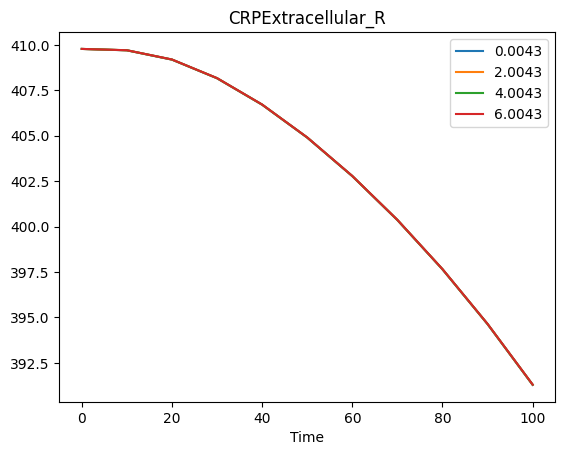

In [8]:
# parameter scan with different species
model = basico.load_model(r'./models/BIOMD0000000537_url.xml')
name = 'R'
output = 'CRPExtracellular'
start_scan = 0.0043
stop_scan = 8.0043
stepsize_scan = (stop_scan-start_scan)/4.
print(stepsize_scan)
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_species(name=name, initial_concentration=val, model=model)
    print(basico.get_species(name=name)['initial_concentration'].values[0])
    res = basico.run_time_course(time, intervals, model = model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_R_CRPExtracellular_537.csv', index=False)
pd.DataFrame(df_result)

2.0
0.0043
0.08740606692174319
2.0043
0.08740606692174319
4.0043
0.08740606692174319
6.0043
0.08740606692174319


,0.0043,2.0043,4.0043,6.0043
Time,,,,
0.0,1.600365e-05,1.600365e-05,1.600365e-05,1.600365e-05
10.0,3.794902e-06,3.799148e-06,3.803365e-06,3.807562e-06
20.0,2.506675e-06,2.508623e-06,2.510541e-06,2.512431e-06
30.0,1.775096e-06,1.776347e-06,1.777587e-06,1.778812e-06
40.0,1.353255e-06,1.354212e-06,1.355168e-06,1.356116e-06
50.0,1.097823e-06,1.098641e-06,1.099462e-06,1.100281e-06
60.0,9.308516e-07,9.316017e-07,9.323564e-07,9.331105e-07
70.0,8.117505e-07,8.124678e-07,8.131895e-07,8.139108e-07
80.0,7.197797e-07,7.204825e-07,7.211891e-07,7.218953e-07


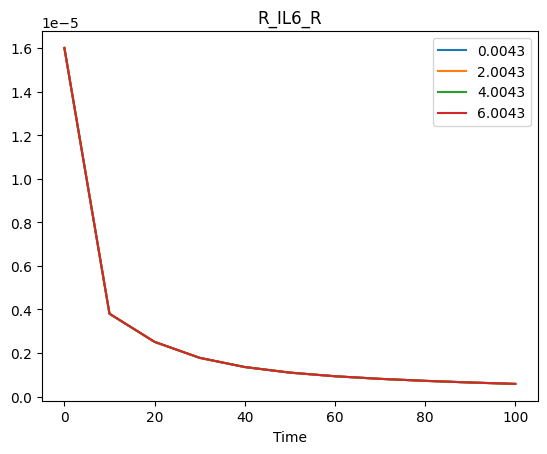

In [9]:
# parameter scan with different species
model = basico.load_model(r'./models/BIOMD0000000537_url.xml')
name = 'R'
output = 'R_IL6'
start_scan = 0.0043
stop_scan = 8.0043
stepsize_scan = (stop_scan-start_scan)/4.
print(stepsize_scan)
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_species(name=name, initial_concentration=val, model=model)
    print(basico.get_species(name=name)['initial_concentration'].values[0])
    res = basico.run_time_course(time, intervals, model = model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_R_IL6_537.csv', index=False)
pd.DataFrame(df_result)

0.001
0.001
2.50075
2.50075
5.000500000000001
5.000500000000001
7.50025
7.50025


,0.00100,2.50075,5.00050,7.50025
Time,,,,
0.0,1.600365e-05,1.600365e-05,1.600365e-05,1.600365e-05
10.0,3.807118e-06,3.784142e-06,3.771716e-06,3.763923e-06
20.0,2.513971e-06,2.500298e-06,2.493157e-06,2.488700e-06
30.0,1.779809e-06,1.771302e-06,1.767139e-06,1.764564e-06
40.0,1.356680e-06,1.350848e-06,1.348285e-06,1.346727e-06
50.0,1.100688e-06,1.096112e-06,1.094375e-06,1.093346e-06
60.0,9.335574e-07,9.294624e-07,9.281396e-07,9.273820e-07
70.0,8.145193e-07,8.104840e-07,8.093607e-07,8.087412e-07
80.0,7.227410e-07,7.185286e-07,7.174920e-07,7.169416e-07


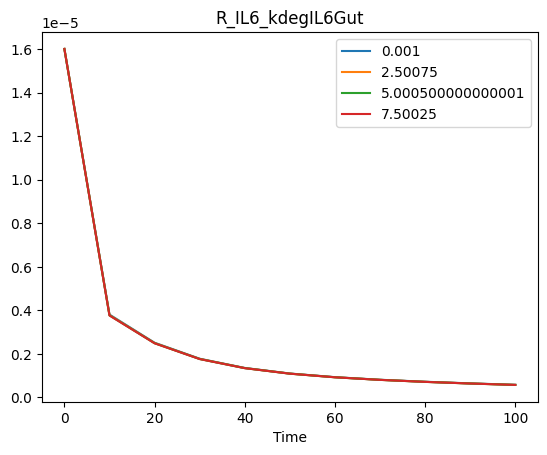

In [12]:
model = basico.load_model(r'./models/BIOMD0000000537_url.xml')
name = 'kdegIL6Gut'
output = 'R_IL6'
start_scan = 1e-3
stop_scan = 10
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_kdegIL6Gut_CRPExtacellular_537.csv', index=False)
pd.DataFrame(df_result)

42.0219999957978
2.1011e-08
2.1011e-08
42.022000016808796
42.02200001680879
84.0440000126066
84.0440000126066
126.0660000084044
126.06600000840439
168.0880000042022
168.0880000042022


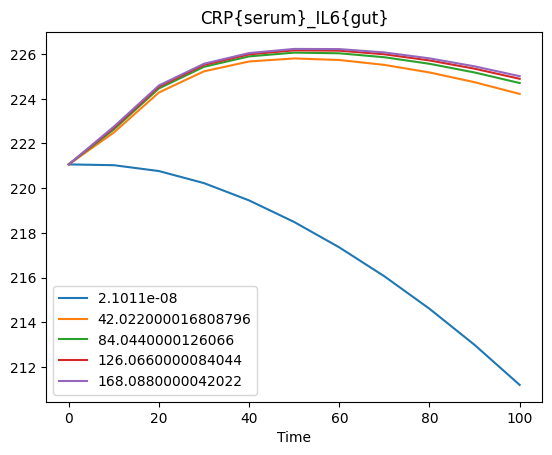

In [158]:
model = basico.load_model(r'./models/BIOMD0000000537_url.xml')
name = 'IL6{gut}'
output = 'CRP{serum}'
start_scan = 2.101100e-08
stop_scan = 2.101100e+02
stepsize_scan = (stop_scan-start_scan)/5.
time = 100
intervals = 10
print(stepsize_scan)
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_species(name=name, initial_concentration=val, model=model)
    print(basico.get_species(name=name)['initial_concentration'].values[0])
    res = basico.run_time_course(time, intervals, model = model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_IL6_CRP_537.csv', index=False)

0.001
0.001
2.50075
2.50075
5.000500000000001
5.000500000000001
7.50025
7.50025


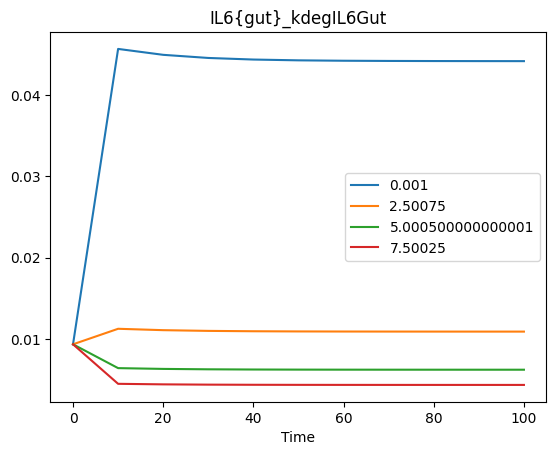

In [144]:
model = basico.load_model(r'./models/BIOMD0000000537_url.xml')
name = 'kdegIL6Gut'
output = 'IL6{gut}'
start_scan = 1e-3
stop_scan = 10
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_kdegIL6Gut_IL6_537.csv', index=False)

24.99975
0.001
0.001
25.00075
25.00075
50.000499999999995
50.000499999999995
75.00025
75.00025


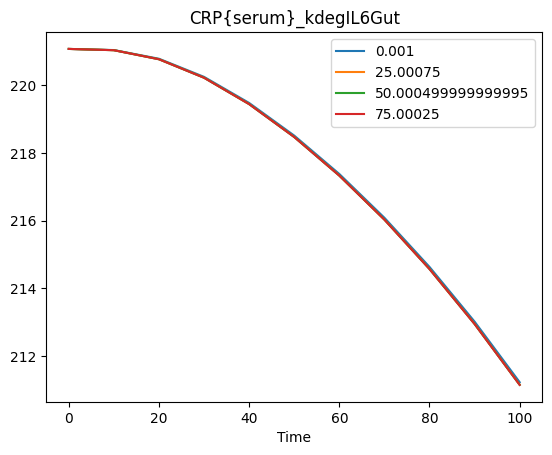

In [159]:
model = basico.load_model(r'./models/BIOMD0000000537_url.xml')
name = 'kdegIL6Gut'
output = 'CRP{serum}'
start_scan = 1e-3
stop_scan = 100
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
print(stepsize_scan)
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_kdegIL6Gut_CRP_537.csv', index=False)

10.0
10.0
157.5
157.5
305.0
305.0
452.5
452.5


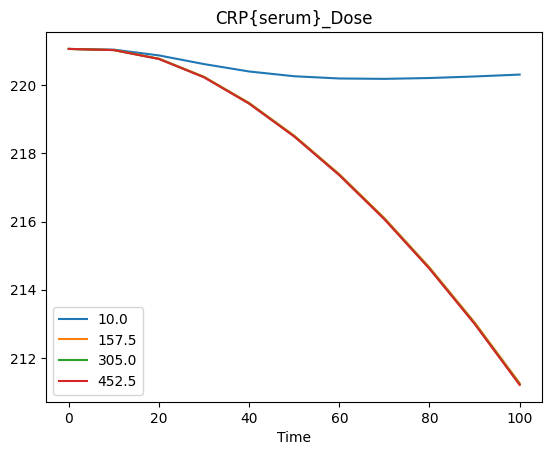

In [146]:
model = basico.load_model(r'./models/BIOMD0000000537_url.xml')
name = 'Dose'
output = 'CRP{serum}'
start_scan = 10
stop_scan = 600
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_Dose_CRP_537.csv', index=False)

Model id 971

In [76]:
basico.get_species(model=mod_epidemiology)

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
Susceptible,Wuhan,reactions,#/ml,1.108100e+07,1.108100e+07,,,1.108100e+07,1.108100e+07,-2739.167828,-2739.167828,Metabolite_44,Susceptible,3968.905658,Susceptible
Exposed,Wuhan,reactions,#/ml,1.051000e+02,1.051000e+02,,,1.051000e+02,1.051000e+02,264.485659,264.485659,Metabolite_45,Exposed,0.376029,Exposed
Infected,Wuhan,reactions,#/ml,2.767900e+01,2.767900e+01,,,2.767900e+01,2.767900e+01,0.223005,0.223005,Metabolite_46,Infected,2.123031,Infected
Asymptomatic,Wuhan,reactions,#/ml,5.353900e+01,5.353900e+01,,,5.353900e+01,5.353900e+01,-5.506903,-5.506903,Metabolite_47,Asymptomatic,7.154099,Asymptomatic
Susceptible_quarantined,Wuhan,reactions,#/ml,7.390000e+02,7.390000e+02,,,7.390000e+02,7.390000e+02,2459.667845,2459.667845,Metabolite_48,Susceptible_quarantined,0.294135,Susceptible_quarantined
Exposed_quarantined,Wuhan,reactions,#/ml,1.164200e+00,1.164200e+00,,,1.164200e+00,1.164200e+00,-0.146520,-0.146520,Metabolite_49,Exposed_quarantined,7.942812,Exposed_quarantined
Hospitalised,Wuhan,reactions,#/ml,1.000000e+00,1.000000e+00,,,1.000000e+00,1.000000e+00,3.702211,3.702211,Metabolite_50,Hospitalised,0.261885,Hospitalised
Recovered,Wuhan,reactions,#/ml,2.000000e+00,2.000000e+00,,,2.000000e+00,2.000000e+00,16.742018,16.742018,Metabolite_51,Recovered,0.119460,Recovered


1999.8
1.0
1.0
2000.8
2000.8
4000.6
4000.6
6000.4
6000.4
8000.2
8000.2


,1.0,2000.8,4000.6,6000.4,8000.2
Time,,,,,
0.0,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
10.0,2.391924e+03,1.343840e+04,2.397491e+04,3.404942e+04,4.370348e+04
20.0,1.401264e+05,3.826256e+05,4.878823e+05,5.558688e+05,6.061882e+05
30.0,8.578770e+05,1.161539e+06,1.262676e+06,1.324776e+06,1.369777e+06
40.0,1.583384e+06,1.840213e+06,1.926570e+06,1.979978e+06,2.018900e+06
50.0,2.202652e+06,2.429077e+06,2.506225e+06,2.554217e+06,2.589339e+06
60.0,2.754337e+06,2.960739e+06,3.031557e+06,3.075756e+06,3.108182e+06
70.0,3.259486e+06,3.450405e+06,3.516139e+06,3.557246e+06,3.587454e+06
80.0,3.727272e+06,3.904781e+06,3.966029e+06,4.004390e+06,4.032622e+06


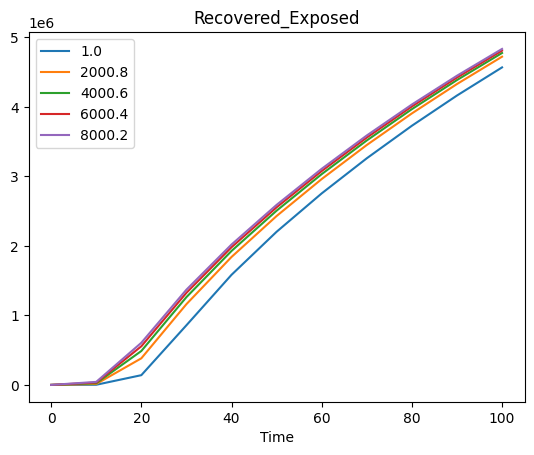

In [165]:
model = basico.load_model(r'./models/Tang2020.xml')
name = 'Exposed'
output = 'Recovered'
start_scan = 1
stop_scan = 10000
stepsize_scan = (stop_scan-start_scan)/5.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
print(stepsize_scan)
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_species(name=name, initial_concentration=val, model=model)
    print(basico.get_species(name=name)['initial_concentration'].values[0])
    res = basico.run_time_course(time, intervals, model = model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_Exposed_Recovered_971.csv', index=False)
pd.DataFrame(df_result)

5.24749725e-06
2.1011e-08
2.1011e-08
5.2685082500000005e-06
5.2685082500000005e-06
1.05160055e-05
1.05160055e-05
1.5763502749999998e-05
1.5763502749999998e-05


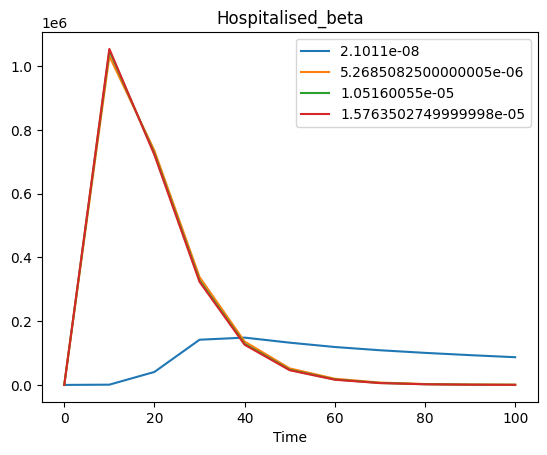

In [164]:
model = basico.load_model(r'./models/Tang2020.xml')
name = 'beta'
output = 'Hospitalised'
start_scan = 2.101100e-08
stop_scan = 2.101100e-05
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
print(stepsize_scan)
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_beta_Hospitalised_971.csv', index=False)

5.24749725e-06
2.1011e-08
2.1011e-08
5.2685082500000005e-06
5.2685082500000005e-06
1.05160055e-05
1.05160055e-05
1.5763502749999998e-05
1.5763502749999998e-05


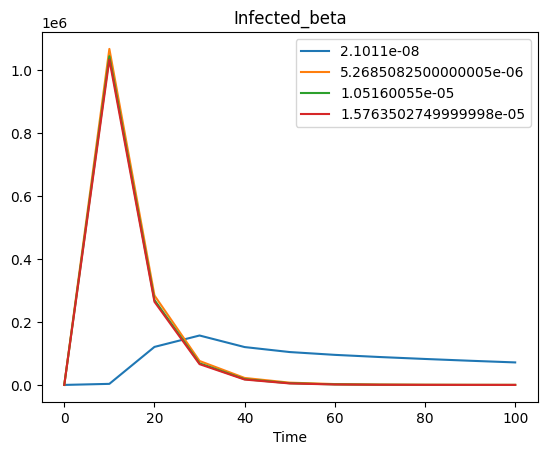

In [161]:
model = basico.load_model(r'./models/Tang2020.xml')
name = 'beta'
output = 'Infected'
start_scan = 2.101100e-08
stop_scan = 2.101100e-05
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
print(stepsize_scan)
# duration and interval has to be provided? -try not to
df_result = {}
res = []
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_beta_Infeceted_971.csv', index=False)

0.35678535749999996
0.00142857
0.00142857
0.3582139275
0.3582139275
0.7149992849999999
0.7149992849999999
1.0717846425
1.0717846425


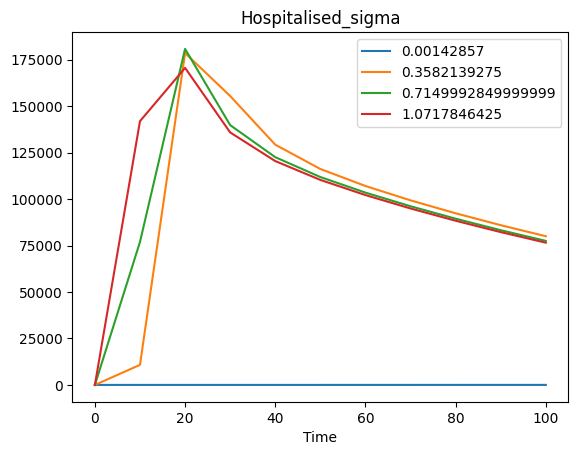

In [162]:
model = basico.load_model(r'./models/Tang2020.xml')
name = 'sigma'
output = 'Hospitalised'
start_scan = 1.428570e-03
stop_scan = 1.428570
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
print(stepsize_scan)
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_sigma_Hospitalized_971.csv', index=False)

0.00142857
0.00142857
0.3582139275
0.3582139275
0.7149992849999999
0.7149992849999999
1.0717846425
1.0717846425


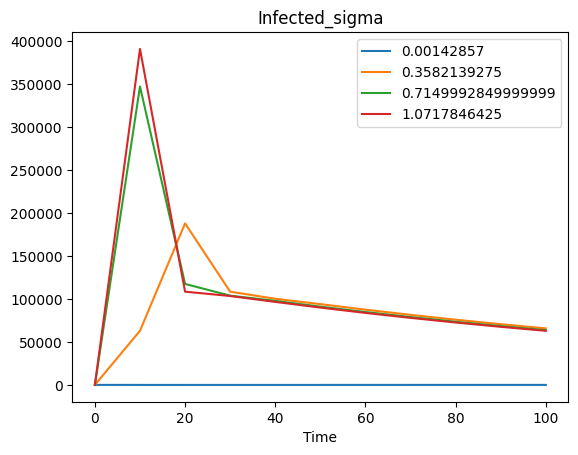

In [ ]:
model = basico.load_model(r'./models/Tang2020.xml')
name = 'sigma'
output = 'Infected'
start_scan = 1.428570e-03
stop_scan = 1.428570
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
print(stepsize_scan)
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_sigma_Infected_971.csv', index=False)

Model id 27

0.01
0.01
0.2575
0.2575
0.505
0.505
0.7525
0.7525


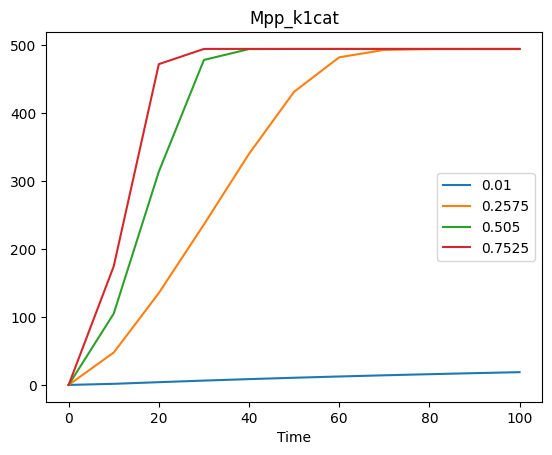

In [ ]:
model = basico.load_model(r'./models/BIOMD0000000027_url.xml')
name = 'k1cat'
output = 'Mpp'
start_scan = 0.01
stop_scan = 1
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
print(stepsize_scan)
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_k1cat_Mpp_27.csv', index=False)

0.01
0.01
0.2575
0.2575
0.505
0.505
0.7525
0.7525


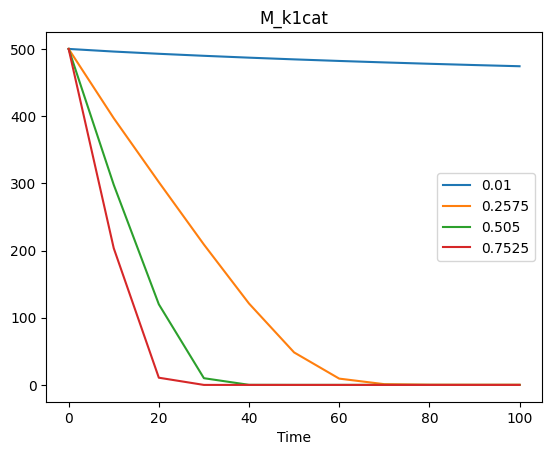

In [ ]:
model = basico.load_model(r'./models/BIOMD0000000027_url.xml')
name = 'k1cat'
output = 'M'
start_scan = 0.01
stop_scan = 1
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
print(stepsize_scan)
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_k1cat_M_27.csv', index=False)

0.01
0.01
0.2575
0.2575
0.505
0.505
0.7525
0.7525


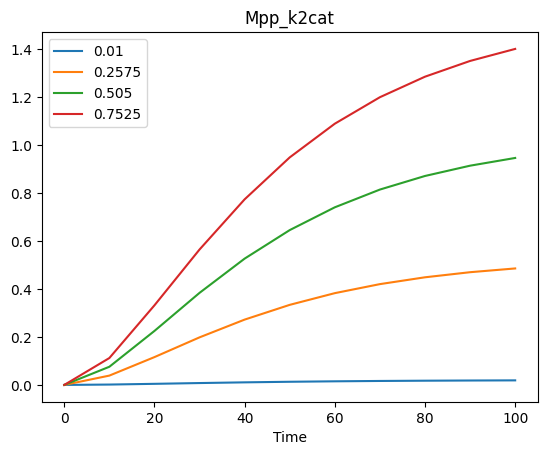

In [155]:
model = basico.load_model(r'./models/BIOMD0000000027_url.xml')
name = 'k2cat'
output = 'Mpp'
start_scan = 0.01
stop_scan = 1
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_k2cat_Mpp_27.csv', index=False)

0.2475
0.01
0.01
0.2575
0.2575
0.505
0.505
0.7525
0.7525


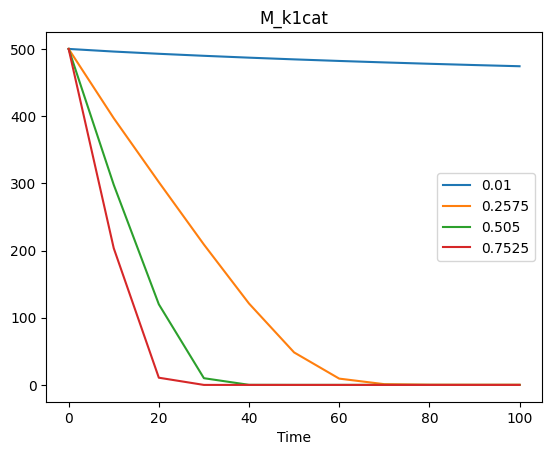

In [163]:
model = basico.load_model(r'./models/BIOMD0000000027_url.xml')
name = 'k1cat'
output = 'M'
start_scan = 0.01
stop_scan = 1
stepsize_scan = (stop_scan-start_scan)/4.
time = 100
intervals = 10
print(stepsize_scan)
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_parameters(name=name, initial_value=val, model=model)
    print(basico.get_parameters(name=name)['initial_value'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_k1cat_M_27.csv', index=False)

1.0
1.0
10.9
10.899999999999999
20.8
20.799999999999997
30.700000000000003
30.7
40.6
40.599999999999994
50.5
50.5
60.400000000000006
60.4
70.3
70.3
80.2
80.19999999999999
90.10000000000001
90.10000000000001


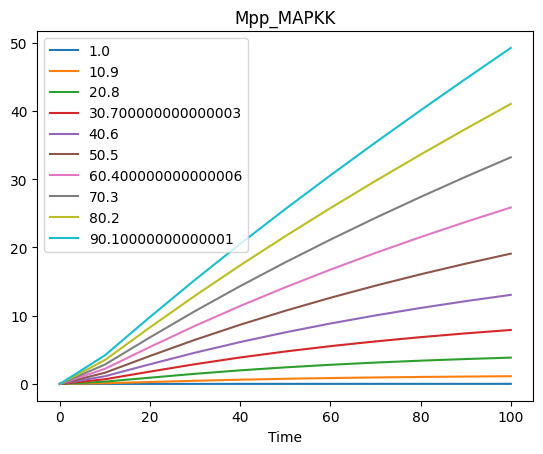

In [157]:
model = basico.load_model(r'./models/BIOMD0000000027_url.xml')
name = 'MAPKK'
output = 'Mpp'
start_scan = 1
stop_scan = 100
stepsize_scan = (stop_scan-start_scan)/10.
time = 100
intervals = 10
# duration and interval has to be provided? -try not to
df_result = {}
for val in np.arange(start = start_scan, stop = stop_scan, step = stepsize_scan):
    print(val)
    basico.set_species(name=name, initial_concentration=val, model=model)
    print(basico.get_species(name=name)['initial_concentration'].values[0])
    res = basico.run_time_course(time, intervals, model =model)
    df_result[val] = res[output]
pd.DataFrame(df_result).plot()
plt.title(output + "_" + name)
pd.DataFrame(df_result).to_csv(r'./tables/scan_MAPKK_Mpp_27.csv', index=False)